In [1]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
z90 = 1.645
z95 = 1.96
z99 = 2.576
%matplotlib inline

In [2]:
# example 7.40
print('''H0: the average score is identical in all lectures. Any observed difference is due to chance. u_1 = u_2 = u_3
HA: at last one lecture's average score is different than others. 
''')

H0: the average score is identical in all lectures. Any observed difference is due to chance. u_1 = u_2 = u_3
HA: at last one lecture's average score is different than others. 



      count      mean       std
pos1                           
C      64.0  0.301938  0.038171
IF    205.0  0.318385  0.037931
OF    160.0  0.319819  0.042607
H0: the average on-base percentage does not vary across player positions. u_c = u_of = u_if
HA: the average on-base percentage varies across at least between some player positions.

independence: if it's a simple random sample of players, independence condition satisfies.
normality: since the data has too many observations, we'll only look for the extreme outliers, there are no extreme outliers.
the data spread normal.
variability: variability in data don't look quite identical but it looks similar



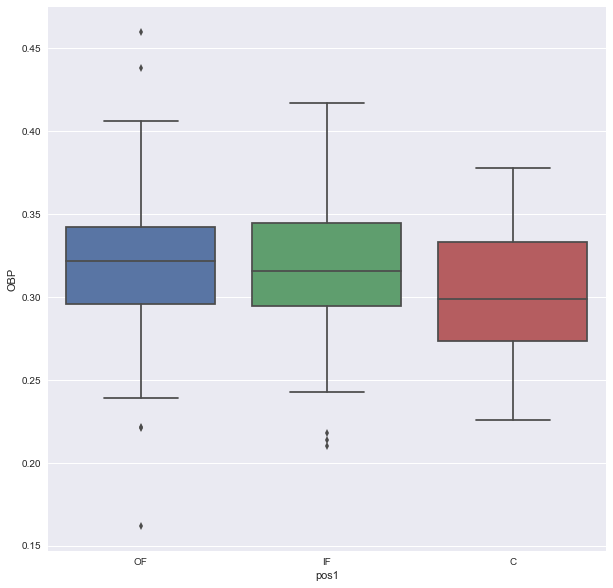

In [5]:
# guided practice 7.42, example 7.43, 7.44
bat18 = pd.read_csv("data/bat18.csv", na_values = "null")
#print(bat18.info())
bat = bat18[ ~((bat18["position"]=="P") | (bat18["position"]=="DH")) & (bat18["AB"] >= 100)][["name","team","position","AB","H","HR","RBI","AVG","OBP"]]
c = ["C"]
of = ['RF', 'LF', 'CF']
bat["pos1"] = bat["position"].apply(lambda x: "C" if x in c else "OF" if x in of else "IF")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sns.boxplot(data=bat, x="pos1", y="OBP", ax=ax)
print(bat.groupby("pos1")["OBP"].describe()[["count","mean","std"]])
print('''H0: the average on-base percentage does not vary across player positions. u_c = u_of = u_if
HA: the average on-base percentage varies across at least between some player positions.

independence: if it's a simple random sample of players, independence condition satisfies.
normality: since the data has too many observations, we'll only look for the extreme outliers, there are no extreme outliers.
the data spread normal.
variability: variability in data don't look quite identical but it looks similar
''')

In [6]:
'''7.35 Fill in the blank. When doing an ANOVA, you observe large differences in means between groups.
Within the ANOVA framework, this would most likely be interpreted as evidence strongly favoring the
hypothesis.'''
print('''When doing an ANOVA, you observe large differences in means between groups.
Within the ANOVA framework, this would most likely be interpreted as evidence strongly favoring the alternative
hypothesis.''')

When doing an ANOVA, you observe large differences in means between groups.
Within the ANOVA framework, this would most likely be interpreted as evidence strongly favoring the alternative
hypothesis.


In [7]:
'''7.36 Which test? We would like to test if students who are in the social sciences, natural sciences, arts
and humanities, and other fields spend the same amount of time studying for this course. What type of test
should we use? Explain your reasoning.'''
print('''ANOVA, because we're testing whether there are differences in multiple groups, we should use ANOVA
to test this problem''')

ANOVA, because we're testing whether there are differences in multiple groups, we should use ANOVA
to test this problem


In [8]:
'''7.37 Chicken diet and weight, Part III. In Exercises 7.27 and 7.29 we compared the effects of two types
of feed at a time. A better analysis would first consider all feed types at once: casein, horsebean, linseed,
meat meal, soybean, and sunflower. The ANOVA output below can be used to test for differences between
the average weights of chicks on different diets.

Conduct a hypothesis test to determine if these data provide convincing evidence that the average weight
of chicks varies across some (or all) groups. Make sure to check relevant conditions. Figures and summary
statistics are shown below.
'''
print('''PREPARE. 
As given in the ANOVA summary table in the example, we should use ANOVA test for this problem. 
H0: every type of feed's effect in average is the same. u_1 = u_2 = ... = u_n
HA: at least one type of feed's effect in average is different.

CHECK. there are three conditions to check for ANOVA:
independence: it's a simple random sample, so independence condition satisfies.
normality: for sunflower, there are some extreme outliers in the data. not every group seems normally distributed.
variance: the variance in groups are not close.
in these conditions, it's not suitable to conduct a hypothesis test using ANOVA for that dataset.
Taking a look at the given side-by-side bar plots,

CALCULATE.
already done in the example.

CONCLUDE.
p value of corresponding f-score is almost 0, so we reject the null hypothesis and conclude,
there's strong evidence in the data that suggests at least some types of chick feed performs different than others.''')

PREPARE. 
As given in the ANOVA summary table in the example, we should use ANOVA test for this problem. 
H0: every type of feed's effect in average is the same. u_1 = u_2 = ... = u_n
HA: at least one type of feed's effect in average is different.

CHECK. there are three conditions to check for ANOVA:
independence: it's a simple random sample, so independence condition satisfies.
normality: for sunflower, there are some extreme outliers in the data. not every group seems normally distributed.
variance: the variance in groups are not close.
in these conditions, it's not suitable to conduct a hypothesis test using ANOVA for that dataset.
Taking a look at the given side-by-side bar plots,

CALCULATE.
already done in the example.

CONCLUDE.
p value of corresponding f-score is almost 0, so we reject the null hypothesis and conclude,
there's strong evidence in the data that suggests at least some types of chick feed performs different than others.


In [9]:
'''7.38 Teaching descriptive statistics. A study compared five different methods for teaching descriptive
statistics. The five methods were traditional lecture and discussion, programmed textbook instruction,
programmed text with lectures, computer instruction, and computer instruction with lectures. 45 students
were randomly assigned, 9 to each method. After completing the course, students took a 1-hour exam.
(a) What are the hypotheses for evaluating if the average test scores are different for the different teaching
methods?
(b) What are the degrees of freedom associated with the F-test for evaluating these hypotheses?
(c) Suppose the p-value for this test is 0.0168. What is the conclusion?'''
print('''a) H0: average test scores of 5 different method groups are the same.
HA: at least one of the 5 different method groups' average test scores are the different than others.
b) 5-1 = 4 degrees of freedom associated with the F-test
C) at least one of the means are different.''')

a) H0: average test scores of 5 different method groups are the same.
HA: at least one of the 5 different method groups' average test scores are the different than others.
b) 5-1 = 4 degrees of freedom associated with the F-test
C) at least one of the means are different.


In [10]:
'''7.39 Coffee, depression, and physical activity. Caffeine is the world's most widely used stimulant, with
approximately 80% consumed in the form of coffee. Participants in a study investigating the relationship
between coffee consumption and exercise were asked to report the number of hours they spent per week on
moderate (e.g., brisk walking) and vigorous (e.g., strenuous sports and jogging) exercise. Based on these
data the researchers estimated the total hours of metabolic equivalent tasks (MET) per week, a value always
greater than 0. The table below gives summary statistics of MET for women in this study based on the
amount of coffee consumed.

(a) Write the hypotheses for evaluating if the average physical activity level varies among the different levels
of coffee consumption.
(b) Check conditions and describe any assumptions you must make to proceed with the test.
(c) Below is part of the output associated with this test. Fill in the empty cells.
(d) What is the conclusion of the test?'''

print('''a) H0: tthe population mean of MET for each group is equal to the others.
HA: At least one pair of means is different.
b) independence: if it's a simple random sample, the condition satisfies.
normality: we should see some diferent visualizations to conclude whether this condition satisfies or not.
but, there are enough data in every group. so if there are no extreme outliers in the data, this seems okay.
variance: the variances are fairly equal. condition satisfied.''')

a) H0: tthe population mean of MET for each group is equal to the others.
HA: At least one pair of means is different.
b) independence: if it's a simple random sample, the condition satisfies.
normality: we should see some diferent visualizations to conclude whether this condition satisfies or not.
but, there are enough data in every group. so if there are no extreme outliers in the data, this seems okay.
variance: the variances are fairly equal. condition satisfied.


In [11]:
'''7.40 Student performance across discussion sections. A professor who teaches a large introductory
statistics class (197 students) with eight discussion sections would like to test if student performance differs
by discussion section, where each discussion section has a different teaching assistant. The summary table
below shows the average final exam score for each discussion section as well as the standard deviation of
scores and the number of students in each section.
The ANOVA output below can be used to test for differences between the average scores from the different
discussion sections.
Conduct a hypothesis test to determine if these data provide convincing evidence that the average score varies
across some (or all) groups. Check conditions and describe any assumptions you must make to proceed with
the test.'''
print('''PREPARE.
H0: average student performance is the same in each discussion section u_1 = u_2 = ... = u_n
HA: average student performance in at least one group is different than others.

CHECK.
independence: we don't know about if it's a random assignment. if not, we can't proceed to ANOVA.
normality: in some groups, there are enough samples (students) but in some of them there aren't. for them,
we need to know about the mins and maximums to better assess if the condition satisfies.
constant variance: the variance doesn't look equal. the condition does not satisfy.

CALCULATE.
already given in the example.

CONCLUDE.
since p-value is over significance level of .05, we fail to reject the null hypothesis and conclude
the data does not provide sufficient evidence to believe there's a difference in those groups other than chance.''')

PREPARE.
H0: average student performance is the same in each discussion section u_1 = u_2 = ... = u_n
HA: average student performance in at least one group is different than others.

CHECK.
independence: we don't know about if it's a random assignment. if not, we can't proceed to ANOVA.
normality: in some groups, there are enough samples (students) but in some of them there aren't. for them,
we need to know about the mins and maximums to better assess if the condition satisfies.
constant variance: the variance doesn't look equal. the condition does not satisfy.

CALCULATE.
already given in the example.

CONCLUDE.
since p-value is over significance level of .05, we fail to reject the null hypothesis and conclude
the data does not provide sufficient evidence to believe there's a difference in those groups other than chance.


In [12]:
'''7.41 GPA and major. Undergraduate students taking an introductory statistics course at Duke University
conducted a survey about GPA and major. The side-by-side box plots show the distribution of GPA among
three groups of majors. Also provided is the ANOVA output.
(a) Write the hypotheses for testing for a difference between average GPA across majors.
(b) What is the conclusion of the hypothesis test?
(c) How many students answered these questions on the survey, i.e. what is the sample size?'''
print('''a) PREPARE.
H0: there are no difference in average GPAs across majors. u_1 = u_2 = u_3
HA: at least one major's average GPA differ from others significantly other than chance alone.

CHECK.
independence: we don't know about if it's a random assignment. if not, we can't proceed to ANOVA.
normality: looking at the side-by-side box plot, the distribution of the GPAs look quite similar and normal.
constant variance: the variance look equal. the condition satisfies.

CALCULATE.
already given in the example.

b) CONCLUDE.
since p-value is over significance level of .05, we fail to reject the null hypothesis and conclude
the data does not provide convinving evidence to believe there's a difference between the average
GPAs across those majors.
c) 198 is the sample size.''')

a) PREPARE.
H0: there are no difference in average GPAs across majors. u_1 = u_2 = u_3
HA: at least one major's average GPA differ from others significantly other than chance alone.

CHECK.
independence: we don't know about if it's a random assignment. if not, we can't proceed to ANOVA.
normality: looking at the side-by-side box plot, the distribution of the GPAs look quite similar and normal.
constant variance: the variance look equal. the condition satisfies.

CALCULATE.
already given in the example.

b) CONCLUDE.
since p-value is over significance level of .05, we fail to reject the null hypothesis and conclude
the data does not provide convinving evidence to believe there's a difference between the average
GPAs across those majors.
c) 198 is the sample size.


In [3]:
'''7.42 Work hours and education. The General Social Survey collects data on demographics, education,
and work, among many other characteristics of US residents. Using ANOVA, we can consider educa-
tional attainment levels for all 1,172 respondents at once. Below are the distributions of hours worked by
educational attainment and relevant summary statistics that will be helpful in carrying out this analysis.

(a) Write hypotheses for evaluating whether the average number of hours worked varies across the five groups.
(b) Check conditions and describe any assumptions you must make to proceed with the test.
(c) Below is part of the output associated with this test. Fill in the empty cells.
(d) What is the conclusion of the test?
'''
n = 1172
k = 5
dfn = k-1
dfd = n-k
p = .0682
f = scipy.stats.f.ppf(q=1-p, dfn=dfn, dfd=dfd) # find critical F-value given degrees of freedom and p-value

print(f'''PREPARE.
"df_degree = {dfn}, df_residuals = {dfd}"
H0: average work hours is the same across all the educational attainment groups.
HA: at least some of the educational attainment groups differ in average work hours.

CHECK. 
independence: if it's randomly sampled, -not given in the example- condition satisfies.
normality: all groups looks normal.
constant variance: across the groups, variability looks sufficiently same.

CALCULATE.
f-value = {f}, p = {p}

CONCLUDE.
since the p-value is greater than our significance level of .05, we fail to reject the H0 and conclude,
the data doesn't provide convincing evidence of working hours depends on educational attainment.''')

PREPARE.
"df_degree = 4, df_residuals = 1167"
H0: average work hours is the same across all the educational attainment groups.
HA: at least some of the educational attainment groups differ in average work hours.

CHECK. 
independence: if it's randomly sampled, -not given in the example- condition satisfies.
normality: all groups looks normal.
constant variance: across the groups, variability looks sufficiently same.

CALCULATE.
f-value = 2.1889312141329578, p = 0.0682

CONCLUDE.
since the p-value is greater than our significance level of .05, we fail to reject the H0 and conclude,
the data doesn't provide convincing evidence of working hours depends on educational attainment.


In [4]:
'''7.43 True / False: ANOVA, Part I. Determine if the following statements are true or false in ANOVA, and
explain your reasoning for statements you identify as false.
(a) As the number of groups increases, the modified significance level for pairwise tests increases as well.
(b) As the total sample size increases, the degrees of freedom for the residuals increases as well.
(c) The constant variance condition can be somewhat relaxed when the sample sizes are relatively consistent
across groups.
(d) The independence assumption can be relaxed when the total sample size is large.'''

print('''a) false. modified significance level decreases when number of groups increases.
b) true.
c) true.
d) false. independence condition depends on if its randomly sampled. but sometimes when there are too
many observations, we can count it is actually independent.
''')

a) false. modified significance level decreases when number of groups increases.
b) true.
c) true.
d) false. independence condition depends on if its randomly sampled. but sometimes when there are too
many observations, we can count it is actually independent.



In [5]:
'''7.44 Child care hours. The China Health and Nutrition Survey aims to examine the effects of the health,
nutrition, and family planning policies and programs implemented by national and local governments. It,
for example, collects information on number of hours Chinese parents spend taking care of their children
under age 6. The side-by-side box plots below show the distribution of this variable by educational attainment
of the parent. Also provided below is the ANOVA output for comparing average hours across educational
attainment categories.
(a) Write the hypotheses for testing for a difference between the average number of hours spent on child
care across educational attainment levels.
(b) What is the conclusion of the hypothesis test?'''
print('''a) H0: there's no difference in taking care of their children across parent groups of 
different educational attainment levels. u_1 = u_2 = ... = u_n
HA: at least one parent group is different than others in terms of taking care of their children.
b) since p is bigger than our significance level of .05, we fail to reject the null hypothesis and conclude
the data does not provide strong evidence of a difference in average taking care of their children across those
parent groups.
''')

a) H0: there's no difference in taking care of their children across parent groups of 
different educational attainment levels. u_1 = u_2 = ... = u_n
HA: at least one parent group is different than others in terms of taking care of their children.
b) since p is bigger than our significance level of .05, we fail to reject the null hypothesis and conclude
the data does not provide strong evidence of a difference in average taking care of their children across those
parent groups.



In [6]:
'''7.45 Prison isolation experiment, Part II. Exercise 7.31 introduced an experiment that was conducted
with the goal of identifying a treatment that reduces subjects' psychopathic deviant T scores, where this
score measures a person's need for control or his rebellion against control. In Exercise 7.31 you evaluated the
success of each treatment individually. An alternative analysis involves comparing the success of treatments.
The relevant ANOVA output is given below.

(a) What are the hypotheses?
(b) What is the conclusion of the test? Use a 5% significance level.
(c) If in part (b) you determined that the test is significant, conduct pairwise tests to determine which
groups are different from each other. If you did not reject the null hypothesis in part (b), recheck your
answer. Summary statistics for each group are provided below.
'''
# comparing the success of treatments with ANOVA.
print('''a) H0: there's no significant difference in average deviant T score differences across groups. all groups are
equally effective.
HA: there's significant difference in average deviant T score differences in at least across two groups groups. some groups 
is more effective than others.
b) because the p-value of 0.0461 is lower than .05 significance level, we reject the H0 and conclude,
in at least some of the groups there are significant differences in average deviant T score differences. some groups are more 
effective than others.
''')
# PAIRWISE t-TESTS.
means = [6.21,2.86,-3.21]
s_p = 9.793
ns = [14,14,14]

# 1 to 2
xbar = means[0] - means[1]
se = np.sqrt((s_p**2 / ns[0]) + (s_p**2 / ns[1]))
df_p = 39
K = (3*(3-1))/2
sl = .05 / K
t = xbar/se
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=df_p) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=df_p) * 2 # two tailed p-value of corresponding t-score
print(f'''Pairwise t-test between treatment 1 and 2:
since p = {p:.4f} bigger than our corrected significance level of {sl:.4f}, we fail to reject the null hypothesis and conclude,
the data does not provide strong evidence of a difference between the effectiveness of treatment 1 and 2.
''')

# 1 to 3
xbar = means[0] - means[2]
se = np.sqrt((s_p**2 / ns[0]) + (s_p**2 / ns[2]))
df_p = 39
K = (3*(3-1))/2
sl = .05 / K
t = xbar/se
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=df_p) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=df_p) * 2 # two tailed p-value of corresponding t-score
print(f'''Pairwise t-test between treatment 1 and 3:
since p = {p:.4f} smaller than our corrected significance level of {sl:.4f}, we reject the null hypothesis and conclude,
there is a statistically significant difference between the effectiveness of treatment 1 and 3. 
''')

# 2 to 3
xbar = means[1] - means[2]
se = np.sqrt((s_p**2 / ns[1]) + (s_p**2 / ns[2]))
df_p = 39
K = (3*(3-1))/2
sl = .05 / K
t = xbar/se
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=df_p) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=df_p) * 2 # two tailed p-value of corresponding t-score
print(f'''Pairwise t-test between treatment 2 and 3:
since p = {p:.4f} bigger than our corrected significance level of {sl:.4f}, we fail to reject the null hypothesis and conclude,
the data does not provide strong evidence of a difference between the effectiveness of treatment 2 and 3.''')

a) H0: there's no significant difference in average deviant T score differences across groups. all groups are
equally effective.
HA: there's significant difference in average deviant T score differences in at least across two groups groups. some groups 
is more effective than others.
b) because the p-value of 0.0461 is lower than .05 significance level, we reject the H0 and conclude,
in at least some of the groups there are significant differences in average deviant T score differences. some groups are more 
effective than others.

Pairwise t-test between treatment 1 and 2:
since p = 0.3710 bigger than our corrected significance level of 0.0167, we fail to reject the null hypothesis and conclude,
the data does not provide strong evidence of a difference between the effectiveness of treatment 1 and 2.

Pairwise t-test between treatment 1 and 3:
since p = 0.0150 smaller than our corrected significance level of 0.0167, we reject the null hypothesis and conclude,
there is a statistically s

In [7]:
'''7.46 True / False: ANOVA, Part II. Determine if the following statements are true or false, and explain
your reasoning for statements you identify as false.
If the null hypothesis that the means of four groups are all the same is rejected using ANOVA at a 5%
significance level, then ...
(a) we can then conclude that all the means are different from one another.
(b) the standardized variability between groups is higher than the standardized variability within groups.
(c) the pairwise analysis will identify at least one pair of means that are significantly different.
(d) the appropriate significance to be used in pairwise comparisons is 0.05 / 4 = 0.0125 since there are four groups.'''
print('''a) false, we can't. because, ANOVA checks all groups simultaneously and detects if there are differences at least 
somewhere in the data. but that doesn't mean all of the groups are different from one another.
b) true.
c) false. might not. maybe there's a difference that we can't detect with pairwise tests.
d) false. K should be (4*(4-1))/2 = 6. corrected significance =  alpha / K = .05 / 6 = 0.0083''')

a) false, we can't. because, ANOVA checks all groups simultaneously and detects if there are differences at least 
somewhere in the data. but that doesn't mean all of the groups are different from one another.
b) true.
c) false. might not. maybe there's a difference that we can't detect with pairwise tests.
d) false. K should be (4*(4-1))/2 = 6. corrected significance =  alpha / K = .05 / 6 = 0.0083
